# Fake News Detector
This is a very naive and simple approach which achieves accuracy of around 0.68 (Naive Bayes) and 0.74 (Linear SVM).

You can definitely do better! But it should give you at least a first framework with which to begin. Here are some things to try:

## Feature Engineering:
Extract additional features from the text, such as:
- Number of words in the article.
- Number of sentences in the article.
- Average word length.
- Presence of specific keywords or phrases.
- Punctuation counts.
- Capitalization features (e.g., ratio of capitalized words).
    
## Word Embeddings:
Use pre-trained word embeddings like Word2Vec, GloVe, or fastText to capture semantic relationships between words. This can provide a richer representation of your text compared to a simple bag-of-words model.

## Deep Learning:
Implement a deep neural network, perhaps a recurrent neural network (RNN) or long short-term memory (LSTM) network, to capture sequential dependencies in the text.

In [1]:
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv("../data/fake_news.csv")

In [4]:
df_genuine = df.copy()
df_genuine.drop('fake_news_article', axis=1, inplace=True)  # Drop the 'fake_news_article' column
df_genuine.rename(columns={'content': 'article'}, inplace=True)  # Rename 'content' to 'article'
df_genuine['is_fake'] = 0  # Set 'is_fake' to 0 for genuine news

In [5]:
# Create a dataframe with fake news
df_fake = df.copy()
df_fake.drop('content', axis=1, inplace=True)  # Drop the 'content' column
df_fake.rename(columns={'fake_news_article': 'article'}, inplace=True)  # Rename 'fake_news_article' to 'article'
df_fake['is_fake'] = 1  # Set 'is_fake' to 1 for fake news

In [6]:
# Concatenate the two dataframes
df_combined = pd.concat([df_genuine, df_fake], ignore_index=True)

In [7]:
# Define features (X) and target (y)
X = df_combined['article']
y = df_combined['is_fake']

In [8]:
# Preprocess the text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization and stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in text.split()]

    # Extract 2-and-3-grams
    ngrams = [" ".join(words[i:i+2]) for i in range(len(words)-1)] + [" ".join(words[i:i+3]) for i in range(len(words)-2)]
    
    return " ".join(ngrams)

X.apply(preprocess_text)

0       video footag footag continu continu to to emer...
1       ’ ’ ’ ’ ’ on on tuesday, tuesday, senat senat ...
2       the islam islam state state rais rais it it th...
3       ’’ ’a ’a frenchman frenchman in in the the ”ad...
4       ’’ ’ ’ mogul mogul donald donald trump trump j...
                              ...                        
1961    the us us women' women' gymnast gymnast team t...
1962    turkish presid presid recep recep tayyip tayyi...
1963    minnesota gov. gov. mark mark dayton, dayton, ...
1964    young twitter twitter user user jackson jackso...
1965    sen. ted ted cruz cruz (r-tx) (r-tx) ha ha cal...
Name: article, Length: 1966, dtype: object

In [9]:
# Split the data into training and testing sets while maintaining equal class sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Use NLTK stopwords
stop_words = list(stopwords.words('english'))

In [11]:
# Create a TfidfVectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # You can adjust max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
# Train a Multinomial Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [13]:
# Train a Linear SVM classifier
clf_svm = SVC(kernel='linear', C=1.0, random_state=42)
clf_svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test_tfidf)
y_pred_svm = clf_svm.predict(X_test_tfidf)

In [15]:
# Evaluate the models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [16]:
# Print the results
print(f"Accuracy (naive Bayes): {accuracy_nb}")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(classification_rep_nb)

print(f"Accuracy (SVM): {accuracy_svm}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(classification_rep_svm)

Accuracy (naive Bayes): 0.6776649746192893

Confusion Matrix:
[[144  53]
 [ 74 123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       197
           1       0.70      0.62      0.66       197

    accuracy                           0.68       394
   macro avg       0.68      0.68      0.68       394
weighted avg       0.68      0.68      0.68       394

Accuracy (SVM): 0.7411167512690355

Confusion Matrix:
[[163  34]
 [ 68 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       197
           1       0.79      0.65      0.72       197

    accuracy                           0.74       394
   macro avg       0.75      0.74      0.74       394
weighted avg       0.75      0.74      0.74       394



Top 20 features:
                  log_prob_genuine  log_prob_fake  log_prob_difference
biden                    -8.884831      -6.516826             2.368006
shocking                 -9.053267      -7.398557             1.654710
praised                  -8.621517      -7.090728             1.530789
anti                     -9.302362      -7.842342             1.460019
stating                  -9.201263      -7.765682             1.435581
heroic                   -9.194037      -7.834842             1.359195
undermine                -9.155384      -7.827132             1.328252
brave                    -9.293346      -8.062008             1.231338
fake                     -8.749092      -7.532609             1.216482
hero                     -9.006141      -7.816723             1.189418
innocent                 -8.835459      -7.655464             1.179995
success                  -8.865239      -7.721870             1.143370
alien                    -9.109947      -7.982986           

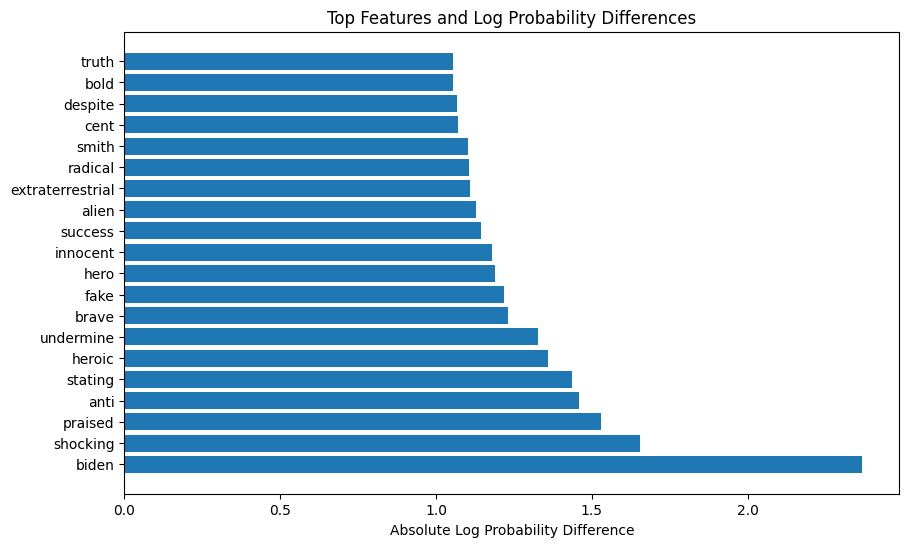

In [17]:
# Extract feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities from the trained Naive Bayes classifier
log_probabilities = clf_nb.feature_log_prob_

# Create a dataframe to store feature names and their log probabilities
feature_importance_df = pd.DataFrame(log_probabilities, columns=feature_names).transpose()

# Rename the columns for better interpretation
feature_importance_df.columns = ['log_prob_genuine', 'log_prob_fake']

# Calculate the absolute difference between log probabilities
feature_importance_df['log_prob_difference'] = abs(feature_importance_df['log_prob_genuine'] - feature_importance_df['log_prob_fake'])

# Sort the dataframe by the absolute log probability difference
sorted_features = feature_importance_df.sort_values(by='log_prob_difference', ascending=False)

# Display the top N features
top_n_features = 20
print(f"Top {top_n_features} features:")
print(sorted_features.head(top_n_features))

# Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features.index[:top_n_features], sorted_features['log_prob_difference'][:top_n_features])
plt.xlabel('Absolute Log Probability Difference')
plt.title('Top Features and Log Probability Differences')
plt.show()

Top 20 features:
         Feature  Coefficient
590        biden     3.700820
3428     praised     3.364671
3907        said    -2.789210
1350     despite     2.316144
4071    shocking     2.166374
4556        told    -1.995219
4151       smith     1.942129
4640        true     1.726937
3134         one    -1.622818
340         anti     1.592953
2568        last    -1.560151
4345     success     1.521021
4635     triumph     1.487209
3941        says    -1.483129
4346  successful     1.477435
2139      heroic     1.474727
4645       truth     1.470406
3810    revealed     1.466880
2452     johnson     1.462387
1838       first    -1.456407


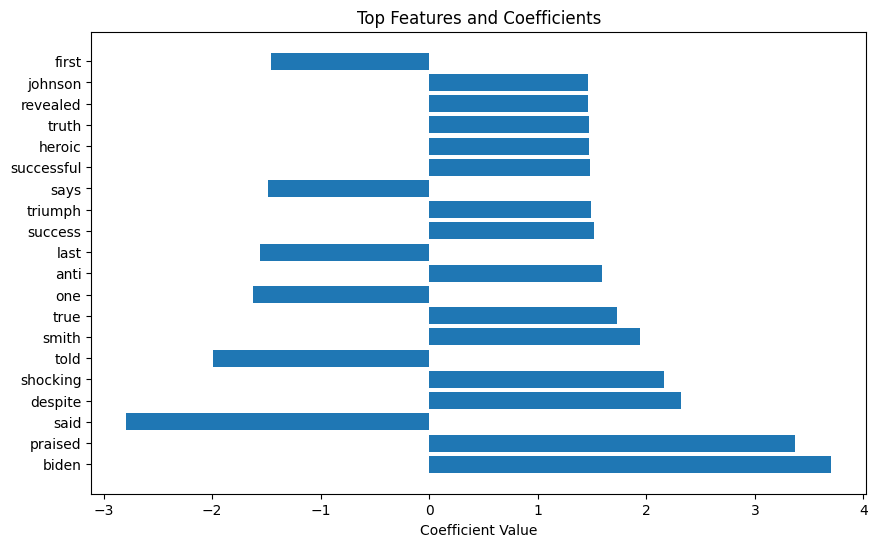

In [18]:
# Extract feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients and intercept from the trained Linear SVM classifier
coefficients = clf_svm.coef_.toarray()[0]  # Convert to a dense array
intercept = clf_svm.intercept_

# Create a dataframe to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the top N features based on absolute coefficient values
top_n_features = 20
sorted_features = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)
print(f"Top {top_n_features} features:")
print(sorted_features.head(top_n_features))

# Plot the top features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'][:top_n_features], sorted_features['Coefficient'][:top_n_features])
plt.xlabel('Coefficient Value')
plt.title('Top Features and Coefficients')
plt.show()